# CHD Data Analysis

Analysing a dataset which contains different variable regarding Coronary Heart Disease (CHD)

In [1]:
#importing Libraries

import pandas as pd
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Reading Data

In [2]:
raw_data = pd.read_csv('F:/Data Projects/framingham2.csv')

In [3]:
raw_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
3653,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3654,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0


In [4]:
#knowing the shape- how many rows and columns
raw_data.shape

(3656, 16)

In [5]:
raw_data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
5,0,46,2,1,15,0,0,0,1,233,106.0,60.0,20.84,75,348,0
6,1,47,2,1,20,0,0,1,1,296,141.0,93.0,28.50,68,332,1
7,1,55,1,1,40,0,0,0,1,205,127.0,76.0,22.24,90,325,1
8,0,47,1,1,1,0,0,1,1,160,197.0,109.0,34.91,82,320,1
9,0,54,1,0,0,0,0,0,1,223,110.0,67.5,21.22,78,294,0


In [6]:
raw_data.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3646,1,62,1,0,0,0,0,0,0,157,130.0,87.0,28.73,72,47,0
3647,1,42,1,1,5,0,0,0,0,197,102.0,70.5,24.68,83,45,0
3648,0,63,1,0,0,0,0,1,0,252,154.0,87.0,28.60,72,45,0
3649,0,59,2,1,15,0,0,1,0,167,156.0,104.0,15.96,72,45,1
3650,1,43,2,0,0,0,0,1,0,245,144.5,95.0,27.15,70,45,0
3651,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
3653,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3654,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0
3655,0,57,1,0,0,0,0,1,0,233,184.0,106.0,38.88,66,40,1


In [7]:
#Copying Data before starting analysis
work_data = raw_data.copy()

In [8]:
work_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
3653,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3654,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0


In [9]:
#Data Frame create
datadf = pd.DataFrame(work_data)

In [10]:
datadf

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,62,3,0,0,0,0,0,1,346,102.5,66.5,17.17,80,394,1
1,0,67,2,0,0,1,0,1,1,303,204.0,96.0,27.86,75,394,1
2,0,62,1,0,0,0,0,0,1,233,130.0,87.0,21.34,85,386,0
3,1,64,3,0,0,0,0,1,1,195,176.0,78.0,24.90,95,370,0
4,0,62,3,1,20,1,0,1,1,358,215.0,110.0,37.62,110,368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,42,3,1,20,0,0,0,0,231,123.0,87.0,21.48,75,44,0
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44,0
3653,1,38,4,0,0,0,0,0,0,240,122.5,80.0,23.97,60,43,0
3654,1,43,2,1,43,0,0,0,0,240,126.0,79.0,21.38,88,40,0


In [11]:
datadf.shape

(3656, 16)

In [12]:
datadf.dtypes

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

Checking for Duplicate Values

In [13]:
datadf.duplicated().sum()

0

In [14]:
duplicate_value = datadf[datadf.duplicated()]
duplicate_value

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Checking for missing value - using isna

In [15]:
datadf.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
missings = datadf[datadf.isna().any(axis=1)]
missings

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Checking for missing value - using isnull

In [17]:
datadf.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
null_values = datadf[datadf.isnull().any(axis=1)]
null_values

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [19]:
datadf.isnull().head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
datadf.isnull().tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Generating some statistical information

In [21]:
datadf.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [22]:
datadf.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [23]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   int64  
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   int64  
 5   BPMeds           3656 non-null   int64  
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   int64  
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   int64  
 14  glucose          3656 non-null   int64  
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 457.1 KB


In [24]:
datadf.kurtosis()

male                -1.949574
age                 -0.991620
education           -0.720177
currentSmoker       -1.999176
cigsPerDay           0.961825
BPMeds              28.008179
prevalentStroke    169.334151
prevalentHyp        -1.337832
diabetes            32.002516
totChol              1.842357
sysBP                2.276697
diaBP                1.261682
BMI                  2.834941
heartRate            1.062541
glucose             60.097287
TenYearCHD           1.747499
dtype: float64

In [25]:
datadf['heartRate'].kurtosis() 

1.062540521667295

In [26]:
datadf.skew()

male                0.226921
age                 0.231170
education           0.690084
currentSmoker       0.043792
cigsPerDay          1.229832
BPMeds              5.476574
prevalentStroke    13.085928
prevalentHyp        0.814187
diabetes            5.829666
totChol             0.663700
sysBP               1.163695
diaBP               0.710388
BMI                 0.999373
heartRate           0.670982
glucose             6.280265
TenYearCHD          1.935599
dtype: float64

In [27]:
datadf['heartRate'].skew()

0.6709822427491055

In [28]:
#determining the correlation
correlation = datadf.corr()
correlation

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


<AxesSubplot:>

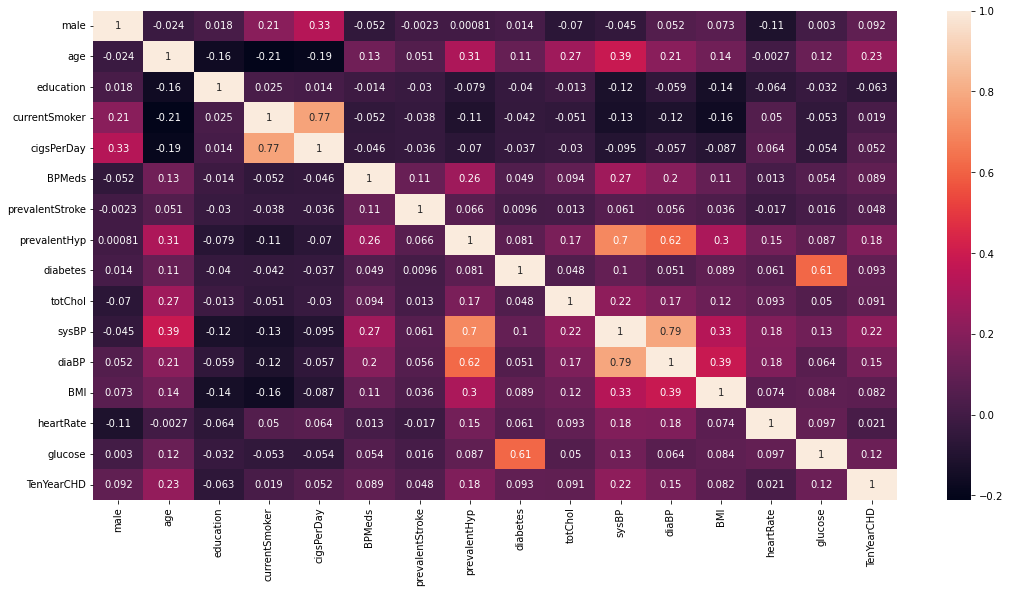

In [29]:
plt.figure(figsize=(18,9))
sns.heatmap(correlation,annot=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6992\871307178.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datadf.hist(ax=ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

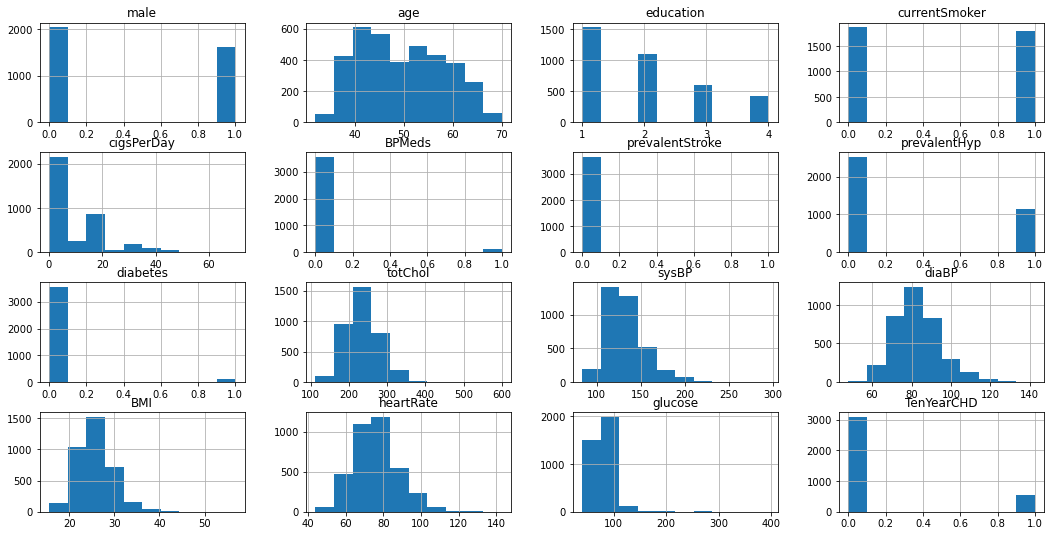

In [30]:
figg = plt.figure(figsize=(18,9))
ax=figg.gca()
datadf.hist(ax=ax)

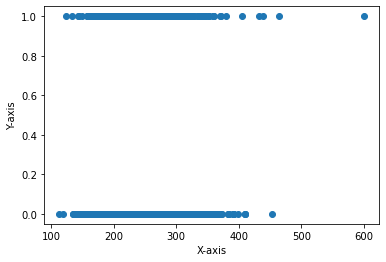

In [31]:
x=datadf['totChol']
y=datadf['TenYearCHD']

plt.scatter(x,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

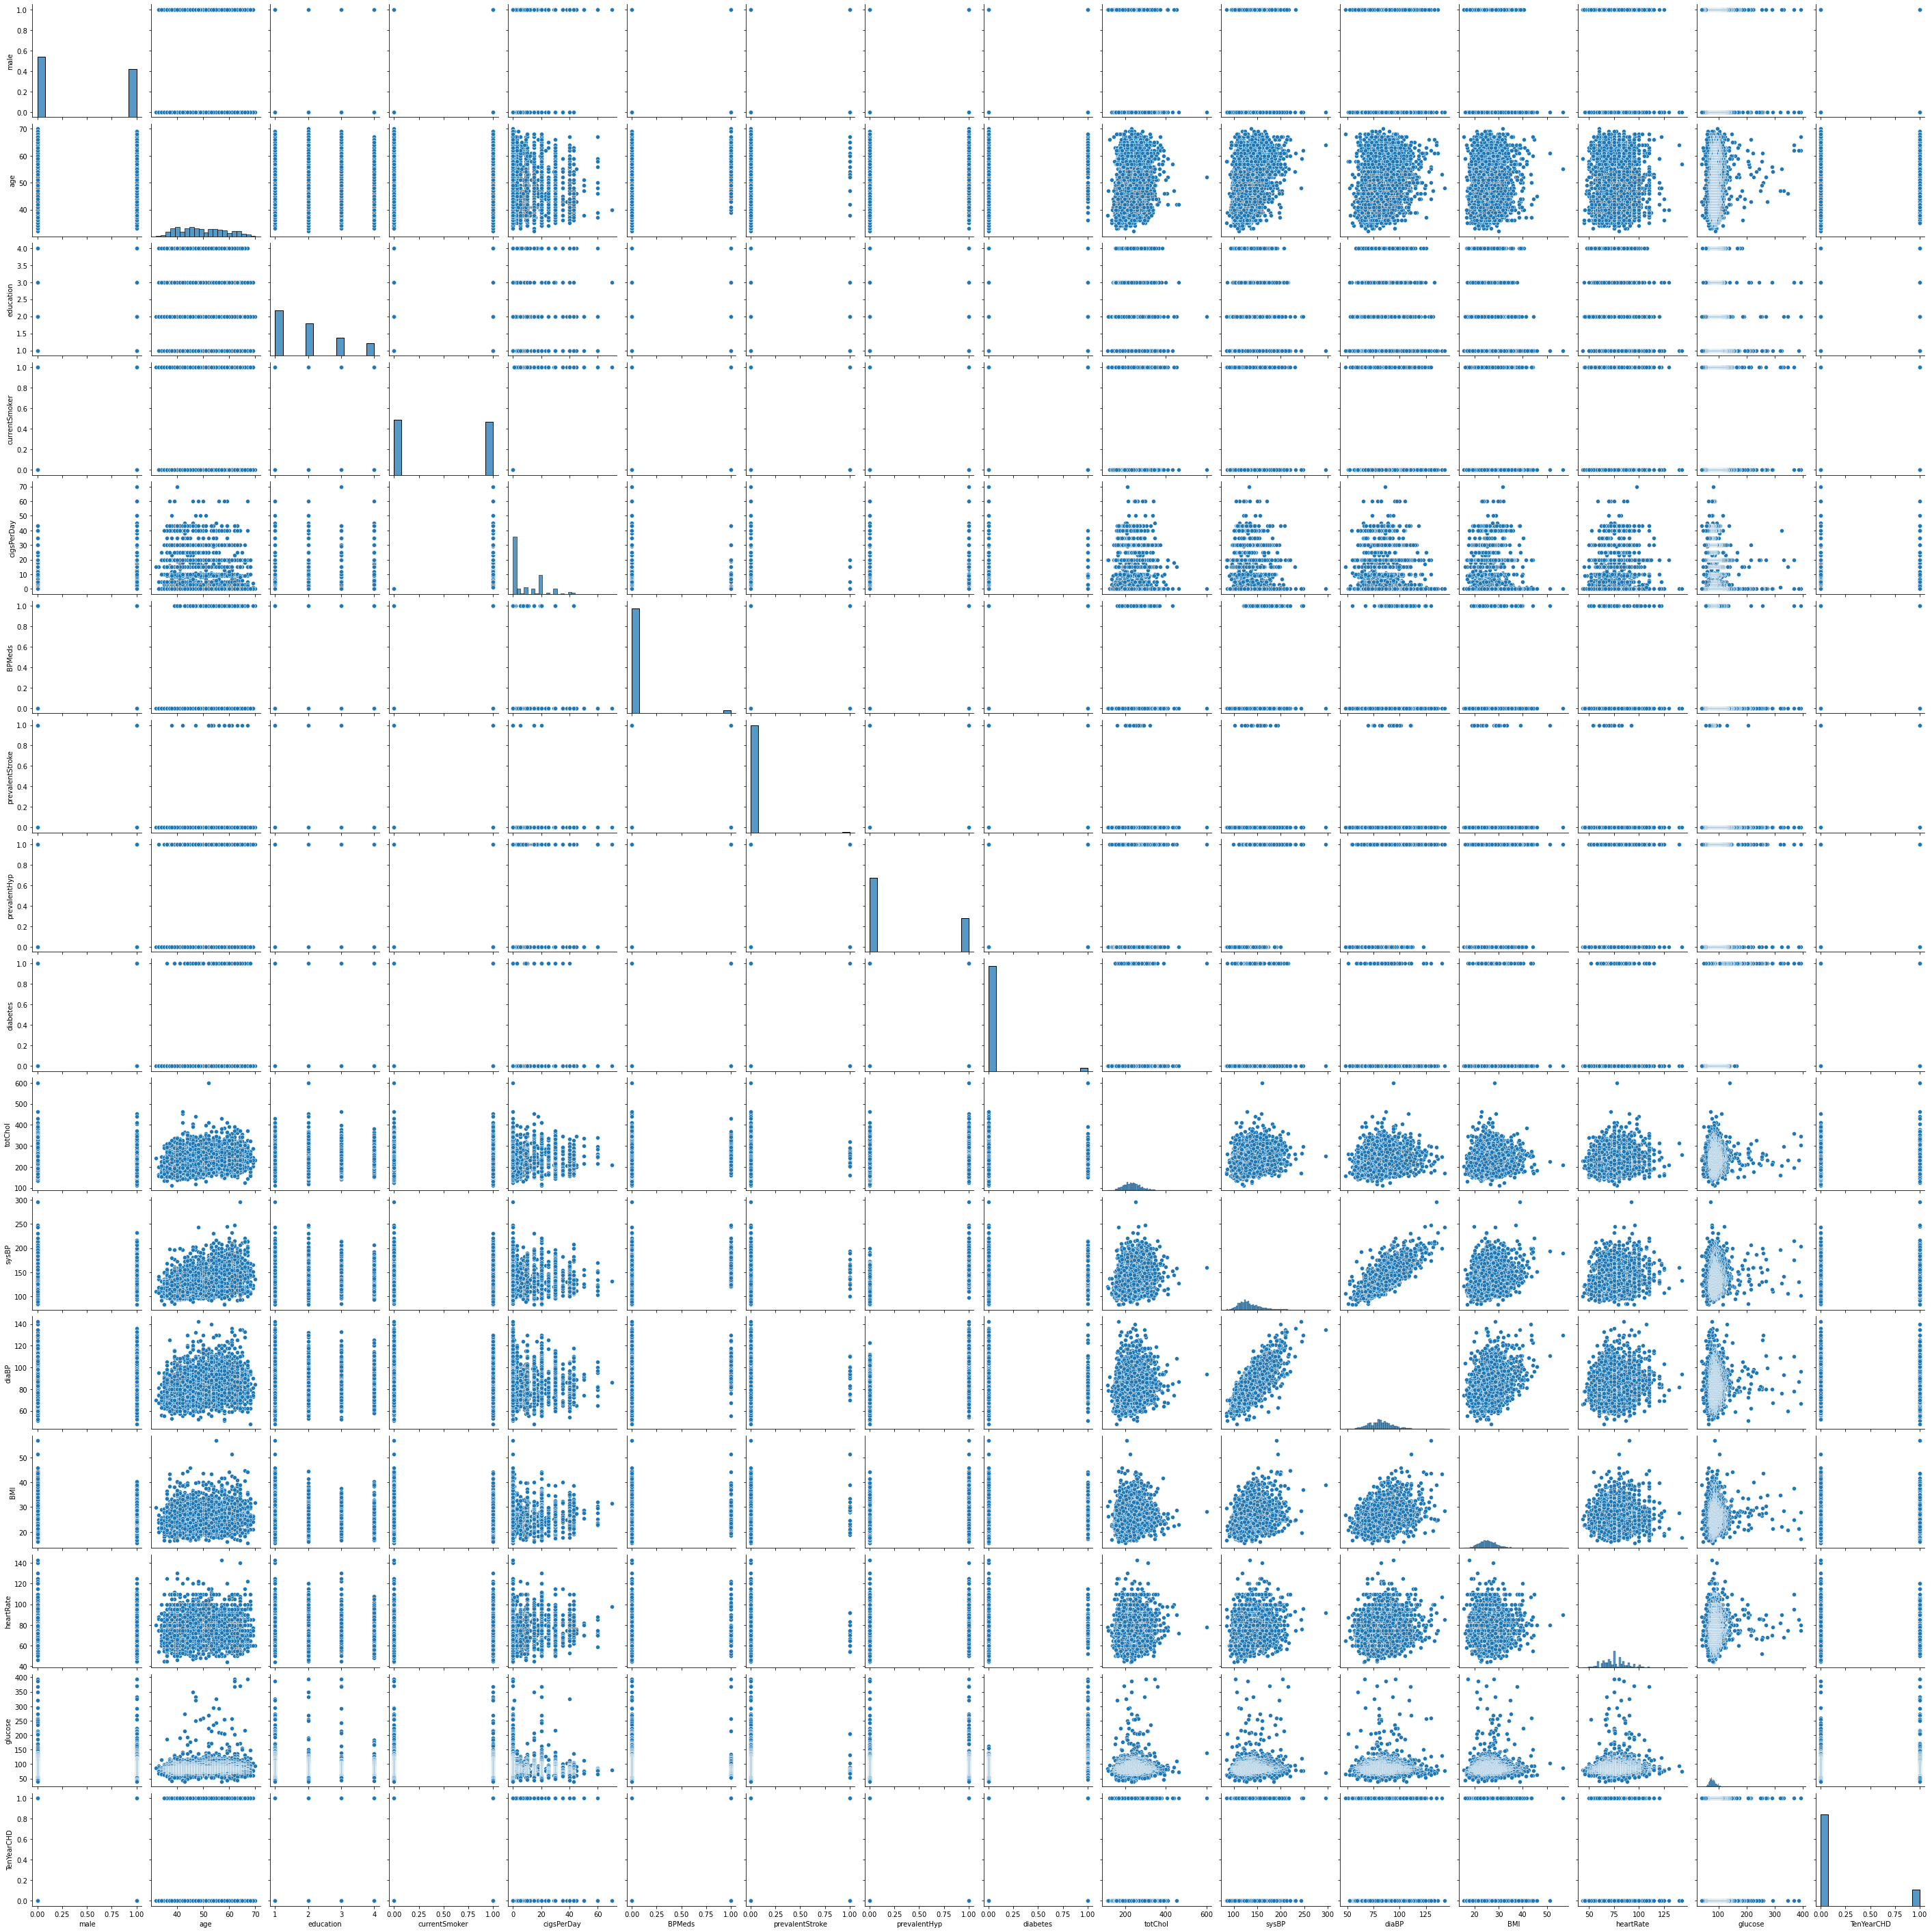

In [32]:
sns.pairplot(datadf)

Class 0:  3099
class 1:  557


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


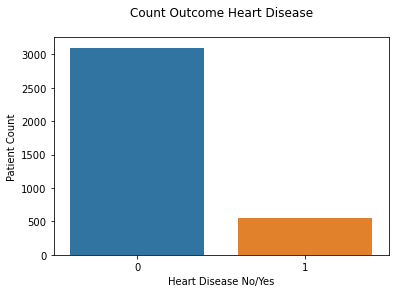

In [33]:
#counting the heart disease patient
total_count = datadf.TenYearCHD.value_counts()
print("Class 0: ",total_count[0])
print("class 1: ",total_count[1])

sns.countplot(datadf.TenYearCHD)
plt.xlabel("Heart Disease No/Yes")
plt.ylabel("Patient Count")
plt.title("Count Outcome Heart Disease\n")

plt.show()

# Train and Test Data

In [34]:
x=datadf.iloc[:,0:15]
y = datadf['TenYearCHD']

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 29)

In [35]:
len(x_train)

2559

In [36]:
x_train.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
561,0,58,1,1,20,0,0,0,0,215,119.5,73.0,29.86,67,93
2921,1,58,4,1,20,0,0,1,0,213,162.0,99.0,28.30,60,70
3652,1,59,1,1,40,0,0,1,0,188,111.0,72.0,21.48,75,44
2760,0,43,2,1,20,0,0,0,0,163,104.5,65.0,17.84,75,71
1433,1,68,1,0,0,0,0,0,0,237,130.0,62.0,33.52,60,82
30,0,58,1,0,0,0,1,1,1,267,157.0,94.0,33.32,92,205
1266,1,48,2,1,20,0,0,0,0,194,102.5,69.0,18.55,79,83
37,0,64,1,0,0,0,0,1,1,262,147.0,90.0,26.51,85,173
1265,1,49,3,1,40,0,0,0,0,167,119.0,67.0,25.83,79,83
1335,0,44,2,1,10,0,0,0,0,221,110.0,76.0,22.16,64,83


In [37]:
len(x_test)

1097

In [38]:
x_test.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3617,1,38,4,1,15,0,0,0,0,248,110.0,61.0,22.17,85,55
3310,0,39,2,1,20,0,0,0,0,247,122.0,70.0,18.70,70,65
2238,1,53,1,1,40,0,0,1,0,270,151.0,89.0,26.76,75,75
2348,0,54,2,1,10,0,0,1,0,246,153.0,80.0,37.30,92,74
1021,1,44,2,1,20,0,0,0,0,225,128.0,82.0,26.79,82,85
3151,0,53,1,1,20,0,0,0,0,222,123.0,82.0,25.52,72,67
522,0,35,2,0,0,0,0,0,0,175,121.5,74.5,20.86,92,93
2069,0,43,1,1,10,0,0,0,0,249,108.0,76.0,27.49,80,76
668,0,59,1,0,0,0,0,1,0,410,142.0,79.0,25.58,78,90
687,0,48,1,1,35,0,0,1,0,174,154.0,84.0,31.76,72,90


Logistic Regression

In [39]:
logs = LogisticRegression()
logs.fit(x_train,y_train)

y_pred=logs.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

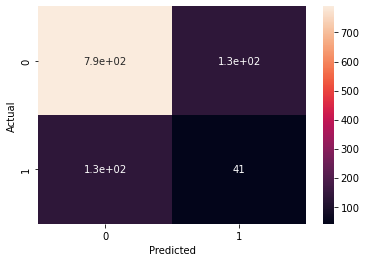

In [41]:
confusion_matrix_D = pd.crosstab(y_test, y_preddt, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_D, annot=True)

In [42]:
dtaccuracy = accuracy_score(y_test,y_preddt)
dtaccuracy*100

75.75205104831359

Random Forest

In [43]:
radfor = RandomForestClassifier(n_estimators = 100,max_features = 'auto',random_state = 29)
radfor.fit(x_train,y_train)
y_predrf=radfor.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

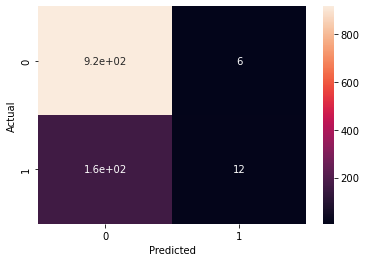

In [44]:
confusion_matrix_rf = pd.crosstab(y_test,y_predrf,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_rf, annot = True)

In [45]:
rfaccur = accuracy_score(y_test,y_predrf)
rfaccur*100

84.77666362807658

Bagging

In [46]:
bagf = BaggingClassifier(n_estimators=10)
bagf.fit(x_train,y_train)
y_predbf = bagf.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

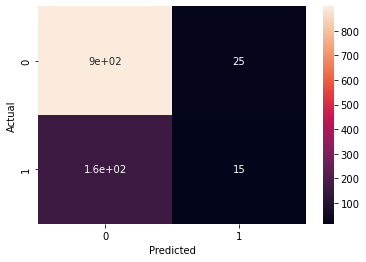

In [47]:
confusMatBag = pd.crosstab(y_test,y_predbf,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusMatBag,annot=True)

In [48]:
bagaccur = accuracy_score(y_test,y_predbf)
bagaccur*100

83.31814038286235

AdaBoosting

In [49]:
adabt = AdaBoostClassifier(n_estimators=100)
adabt.fit(x_train,y_train)
y_predadb = adabt.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

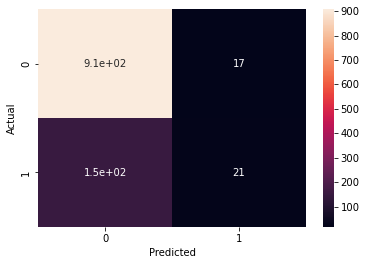

In [50]:
confusMatAdaBst = pd.crosstab(y_test,y_predadb,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusMatAdaBst, annot=True)

In [51]:
adaaccur = accuracy_score(y_test,y_predadb)
adaaccur*100

84.5943482224248

Gradient Boosting

In [52]:
gdbst = GradientBoostingClassifier(n_estimators=100)
gdbst.fit(x_train,y_train)
y_predgdt = gdbst.predict(x_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

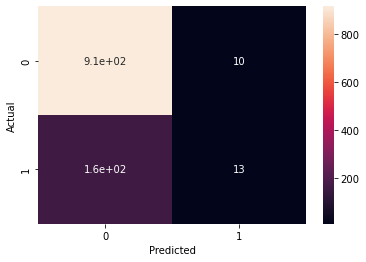

In [53]:
confusMatGrad=pd.crosstab(y_test, y_predgdt,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusMatGrad,annot=True)

In [54]:
GdBaccur = accuracy_score(y_test,y_predgdt)
GdBaccur * 100

84.5031905195989

compare model accuracy

In [55]:
if dtaccuracy > rfaccur and dtaccuracy >bagaccur and dtaccuracy>adaaccur and dtaccuracy>GdBaccur:
    print('Decision Tree is the Best Fit')
if rfaccur > dtaccuracy and rfaccur > bagaccur and rfaccur > adaaccur and rfaccur > GdBaccur:
    print('Random Forest is the Best Fit')
if bagaccur > dtaccuracy and bagaccur > rfaccur and bagaccur > adaaccur and bagaccur >GdBaccur:
    print('Bagging is the Best Fit')
if adaaccur > dtaccuracy and adaaccur > rfaccur and adaaccur > bagaccur and adaaccur> GdBaccur:
    print('AdaBoosting is the Best Fit')
if GdBaccur > dtaccuracy and GdBaccur > rfaccur and GdBaccur >bagaccur and GdBaccur > adaaccur:
    print('GradientBoosting is the Best Fit')

Random Forest is the Best Fit


In [56]:
#Random Forest is the best fit, so will predict value using this model

#read the data to predict with

new_data=pd.read_csv('F:/Data Projects/ASDS_test.csv')

In [57]:
new_datafrm = pd.DataFrame(new_data)

In [58]:
#checking the shape of the dataset
new_datafrm.shape

(18, 15)

In [59]:
new_datafrm

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,40,2,1,15,0,0,1,0,232,140.0,92.0,26.56,75,73
1,0,38,2,0,0,0,0,0,0,175,142.0,86.0,22.01,82,73
2,0,48,3,1,5,0,0,0,0,192,135.0,82.5,32.67,67,69
3,0,49,1,0,0,0,0,0,0,270,126.5,67.5,26.56,70,77
4,0,39,2,0,0,0,0,1,0,252,128.0,93.0,30.36,105,63
5,0,47,2,1,6,0,0,0,0,234,128.0,91.0,25.59,80,93
6,0,41,2,1,20,0,0,0,0,235,144.0,88.0,24.16,95,82
7,1,37,2,1,20,0,0,0,0,272,114.5,80.0,27.60,63,57
8,1,49,3,1,40,0,0,0,0,167,119.0,67.0,25.83,79,83
9,0,50,2,1,20,0,0,0,0,235,121.0,78.0,23.01,52,78


In [60]:
#predict value using Random Forest
predict_CHD=radfor.predict(new_datafrm)

In [61]:
predict_CHD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
#creating Dataframe from predicted value
chdDF=pd.DataFrame(predict_CHD)

In [63]:
chdDF

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [64]:
#adding predicted value to its corresponding rows
# TenYearCHD the column name used in the earlier dataset, so naming like that
new_datafrm['TenYearCHD']=chdDF

In [65]:
new_datafrm

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,40,2,1,15,0,0,1,0,232,140.0,92.0,26.56,75,73,0
1,0,38,2,0,0,0,0,0,0,175,142.0,86.0,22.01,82,73,0
2,0,48,3,1,5,0,0,0,0,192,135.0,82.5,32.67,67,69,0
3,0,49,1,0,0,0,0,0,0,270,126.5,67.5,26.56,70,77,0
4,0,39,2,0,0,0,0,1,0,252,128.0,93.0,30.36,105,63,0
5,0,47,2,1,6,0,0,0,0,234,128.0,91.0,25.59,80,93,0
6,0,41,2,1,20,0,0,0,0,235,144.0,88.0,24.16,95,82,0
7,1,37,2,1,20,0,0,0,0,272,114.5,80.0,27.60,63,57,0
8,1,49,3,1,40,0,0,0,0,167,119.0,67.0,25.83,79,83,0
9,0,50,2,1,20,0,0,0,0,235,121.0,78.0,23.01,52,78,0


In [66]:
#checking the new shape
new_datafrm.shape

(18, 16)

In [67]:
# saving predicted value into an Excel file
new_datafrm.to_excel("F:/Data Projects/Predicted Value.xlsx")